In [1]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm

from simulation import PoissonNeuron, bins_spike, get_orientation, get_theta_time_series
import constant as ct


# 1.1

100%|██████████| 9999/9999 [00:00<00:00, 21626.34it/s]


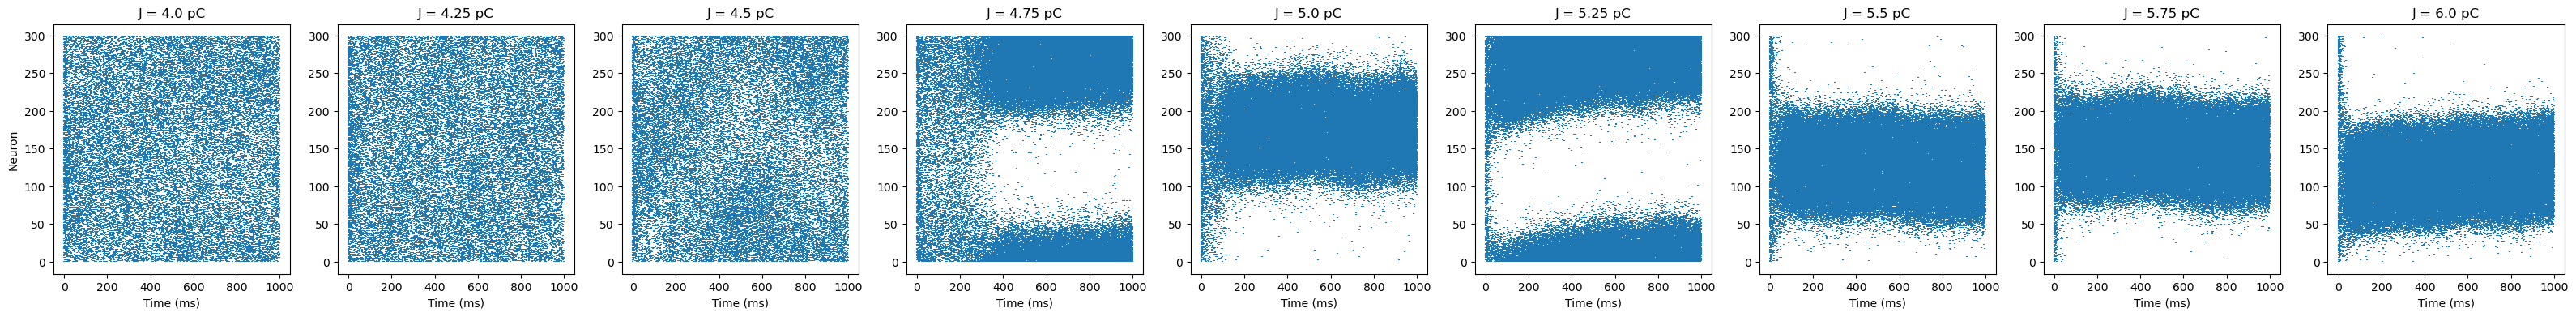

In [2]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(1, len(J_values), figsize=(40, 4))
ax[0].set_ylabel('Neuron')

for i, J in enumerate(J_values):
    network = PoissonNeuron(J=J)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal')
    ax[i].set_title(f'J = {J} pC')
    ax[i].set_xlabel('Time (ms)')
plt.show()
    

A jump is visible for J bigger than 4.75 pC

# 1.2

In [3]:
print(get_orientation(np.array([0, 1,5,10]), 11))
print(get_orientation(np.array([0,1,499,500,999]), 1000))

[ 16.36363636  49.09090909 180.         343.63636364]
[1.8000e-01 5.4000e-01 1.7982e+02 1.8018e+02 3.5982e+02]


In [4]:
network = PoissonNeuron()
h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
s = bins_spike(s, 10)
theta = get_theta_time_series(spikes=s)

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:00<00:00, 20309.80it/s]


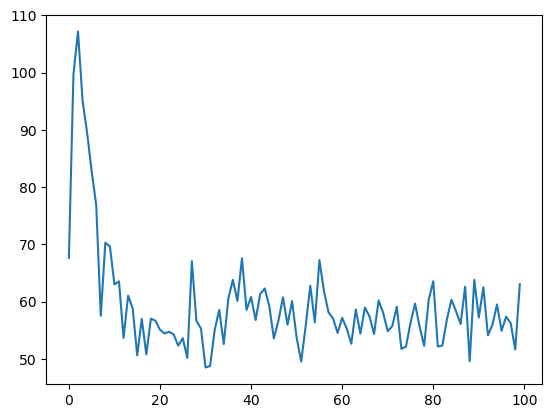

In [5]:
plt.plot(theta)

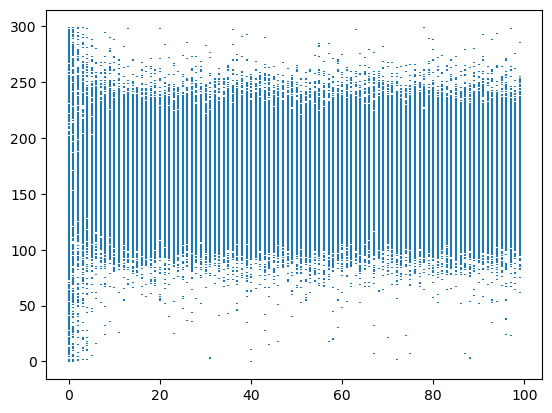

In [6]:
fig = plt.figure()
spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
plt.eventplot(spike_times, orientation='horizontal')

# 1.4

100%|██████████| 9999/9999 [00:00<00:00, 20303.02it/s]


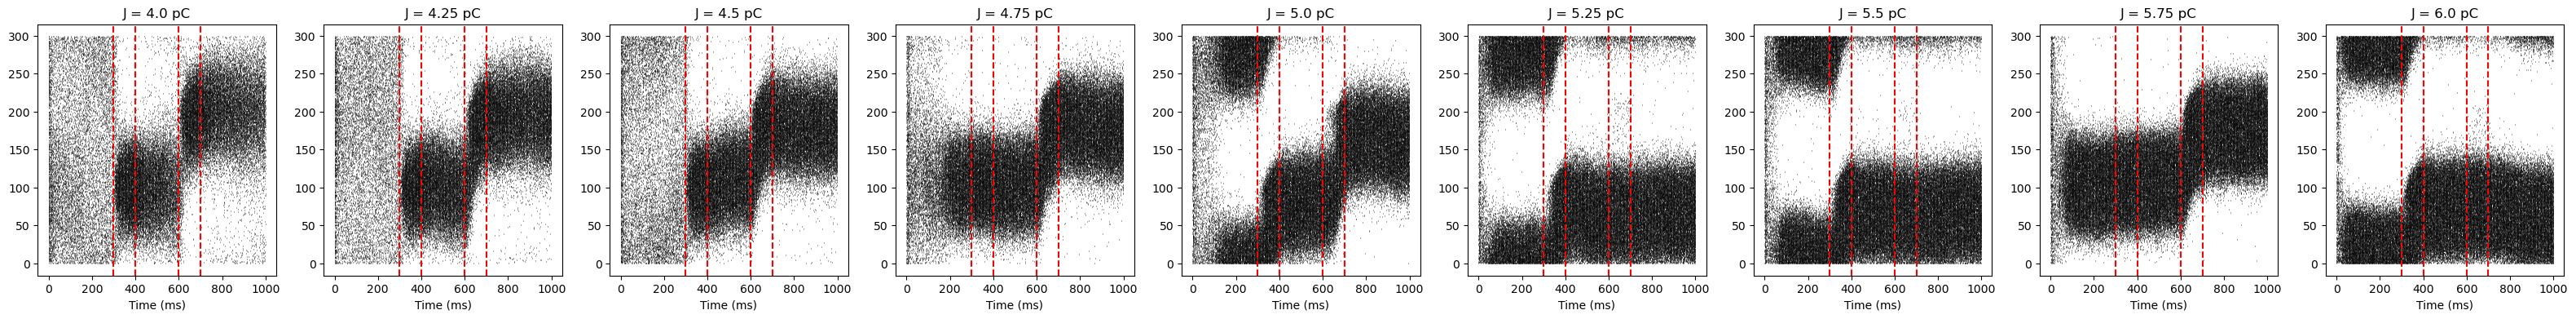

In [7]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(1, len(J_values), figsize=(40, 4))

for i, J in enumerate(J_values):
    network = PoissonNeuron(J=J, I_ext=True)
    
    _, spike_ext_current = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    spike_ext_current = bins_spike(spike_ext_current, 1)
    spike_times = [np.where(spike_ext_current.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
    [ax[i].axvline(x=x, color='red', linestyle='--') for x in [300, 400,600,700]]
    ax[i].set_title(f'J = {J} pC')
    ax[i].set_xlabel('Time (ms)')
plt.show()
    

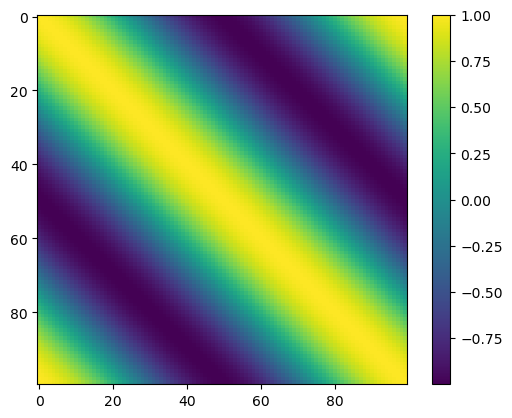

In [8]:
# connectivity profile

x = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
w = np.cos(x-x.T)
plt.imshow(w)
plt.colorbar()

Attract neuron at proximity and inhibit neurons far away

# 1.5

100%|██████████| 9999/9999 [00:00<00:00, 21638.37it/s]


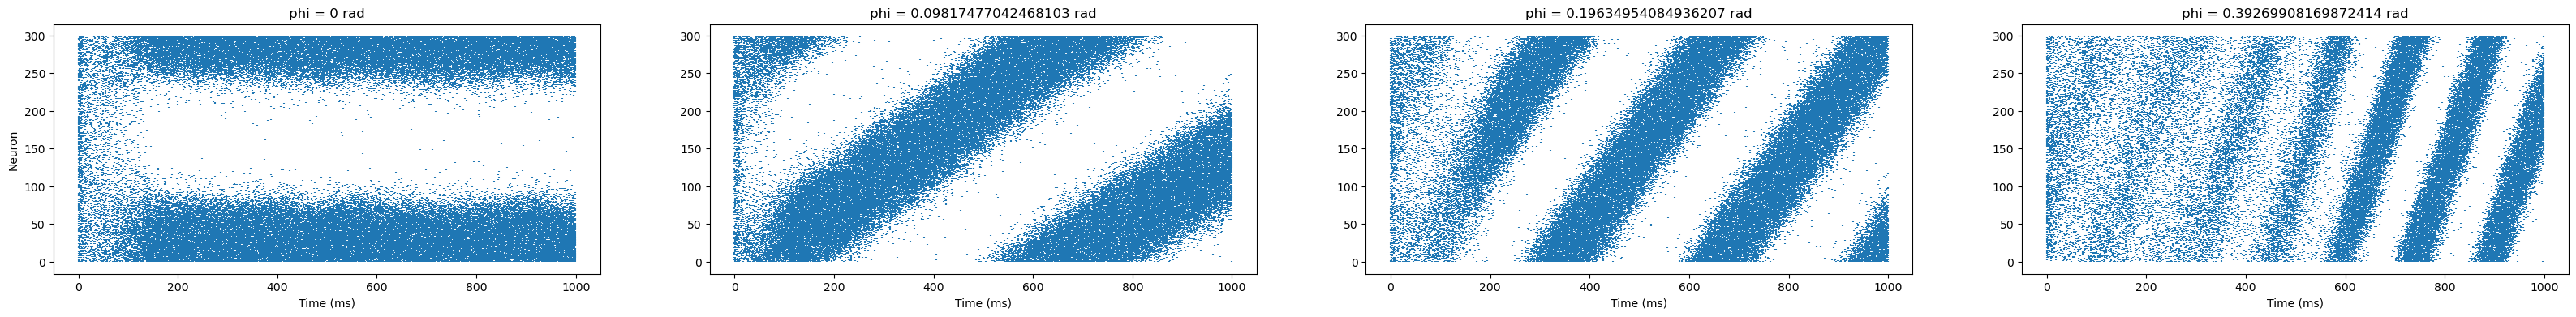

In [9]:
phi_values = [0, np.pi/32, np.pi/16, np.pi/8]

fig, ax = plt.subplots(1, len(phi_values), figsize=(40, 4))
ax[0].set_ylabel('Neuron')

for i, phi in enumerate(phi_values):
    network = PoissonNeuron(phi=phi)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal')
    ax[i].set_title(f'phi = {phi} rad')
    ax[i].set_xlabel('Time (ms)')
plt.show()
    

With the original connectivity $( w(x_i, x_j))$, the network generates a bump pattern that is symmetric.

However, when the connectivity is given by $( w(x_i - \varphi, x_j))$, a phase shift occurs in the connectivity pattern. This means that the activity bump will also exhibit a phase shift by an amount equal to $( \varphi )$. We can expect a shift in the behavior of the bump due to this phase difference. 

## 1.6

J1 = 1 and sigma = 3.141592653589793


100%|██████████| 9999/9999 [00:08<00:00, 1134.63it/s]


J1 = 10 and sigma = 3.141592653589793


100%|██████████| 9999/9999 [00:08<00:00, 1196.02it/s]


J1 = 1 and sigma = 1.5707963267948966


100%|██████████| 9999/9999 [00:08<00:00, 1117.49it/s]


J1 = 10 and sigma = 1.5707963267948966


100%|██████████| 9999/9999 [00:07<00:00, 1265.28it/s]


J1 = 1 and sigma = 1.0471975511965976


100%|██████████| 9999/9999 [00:08<00:00, 1157.97it/s]


J1 = 10 and sigma = 1.0471975511965976


100%|██████████| 9999/9999 [00:08<00:00, 1142.40it/s]


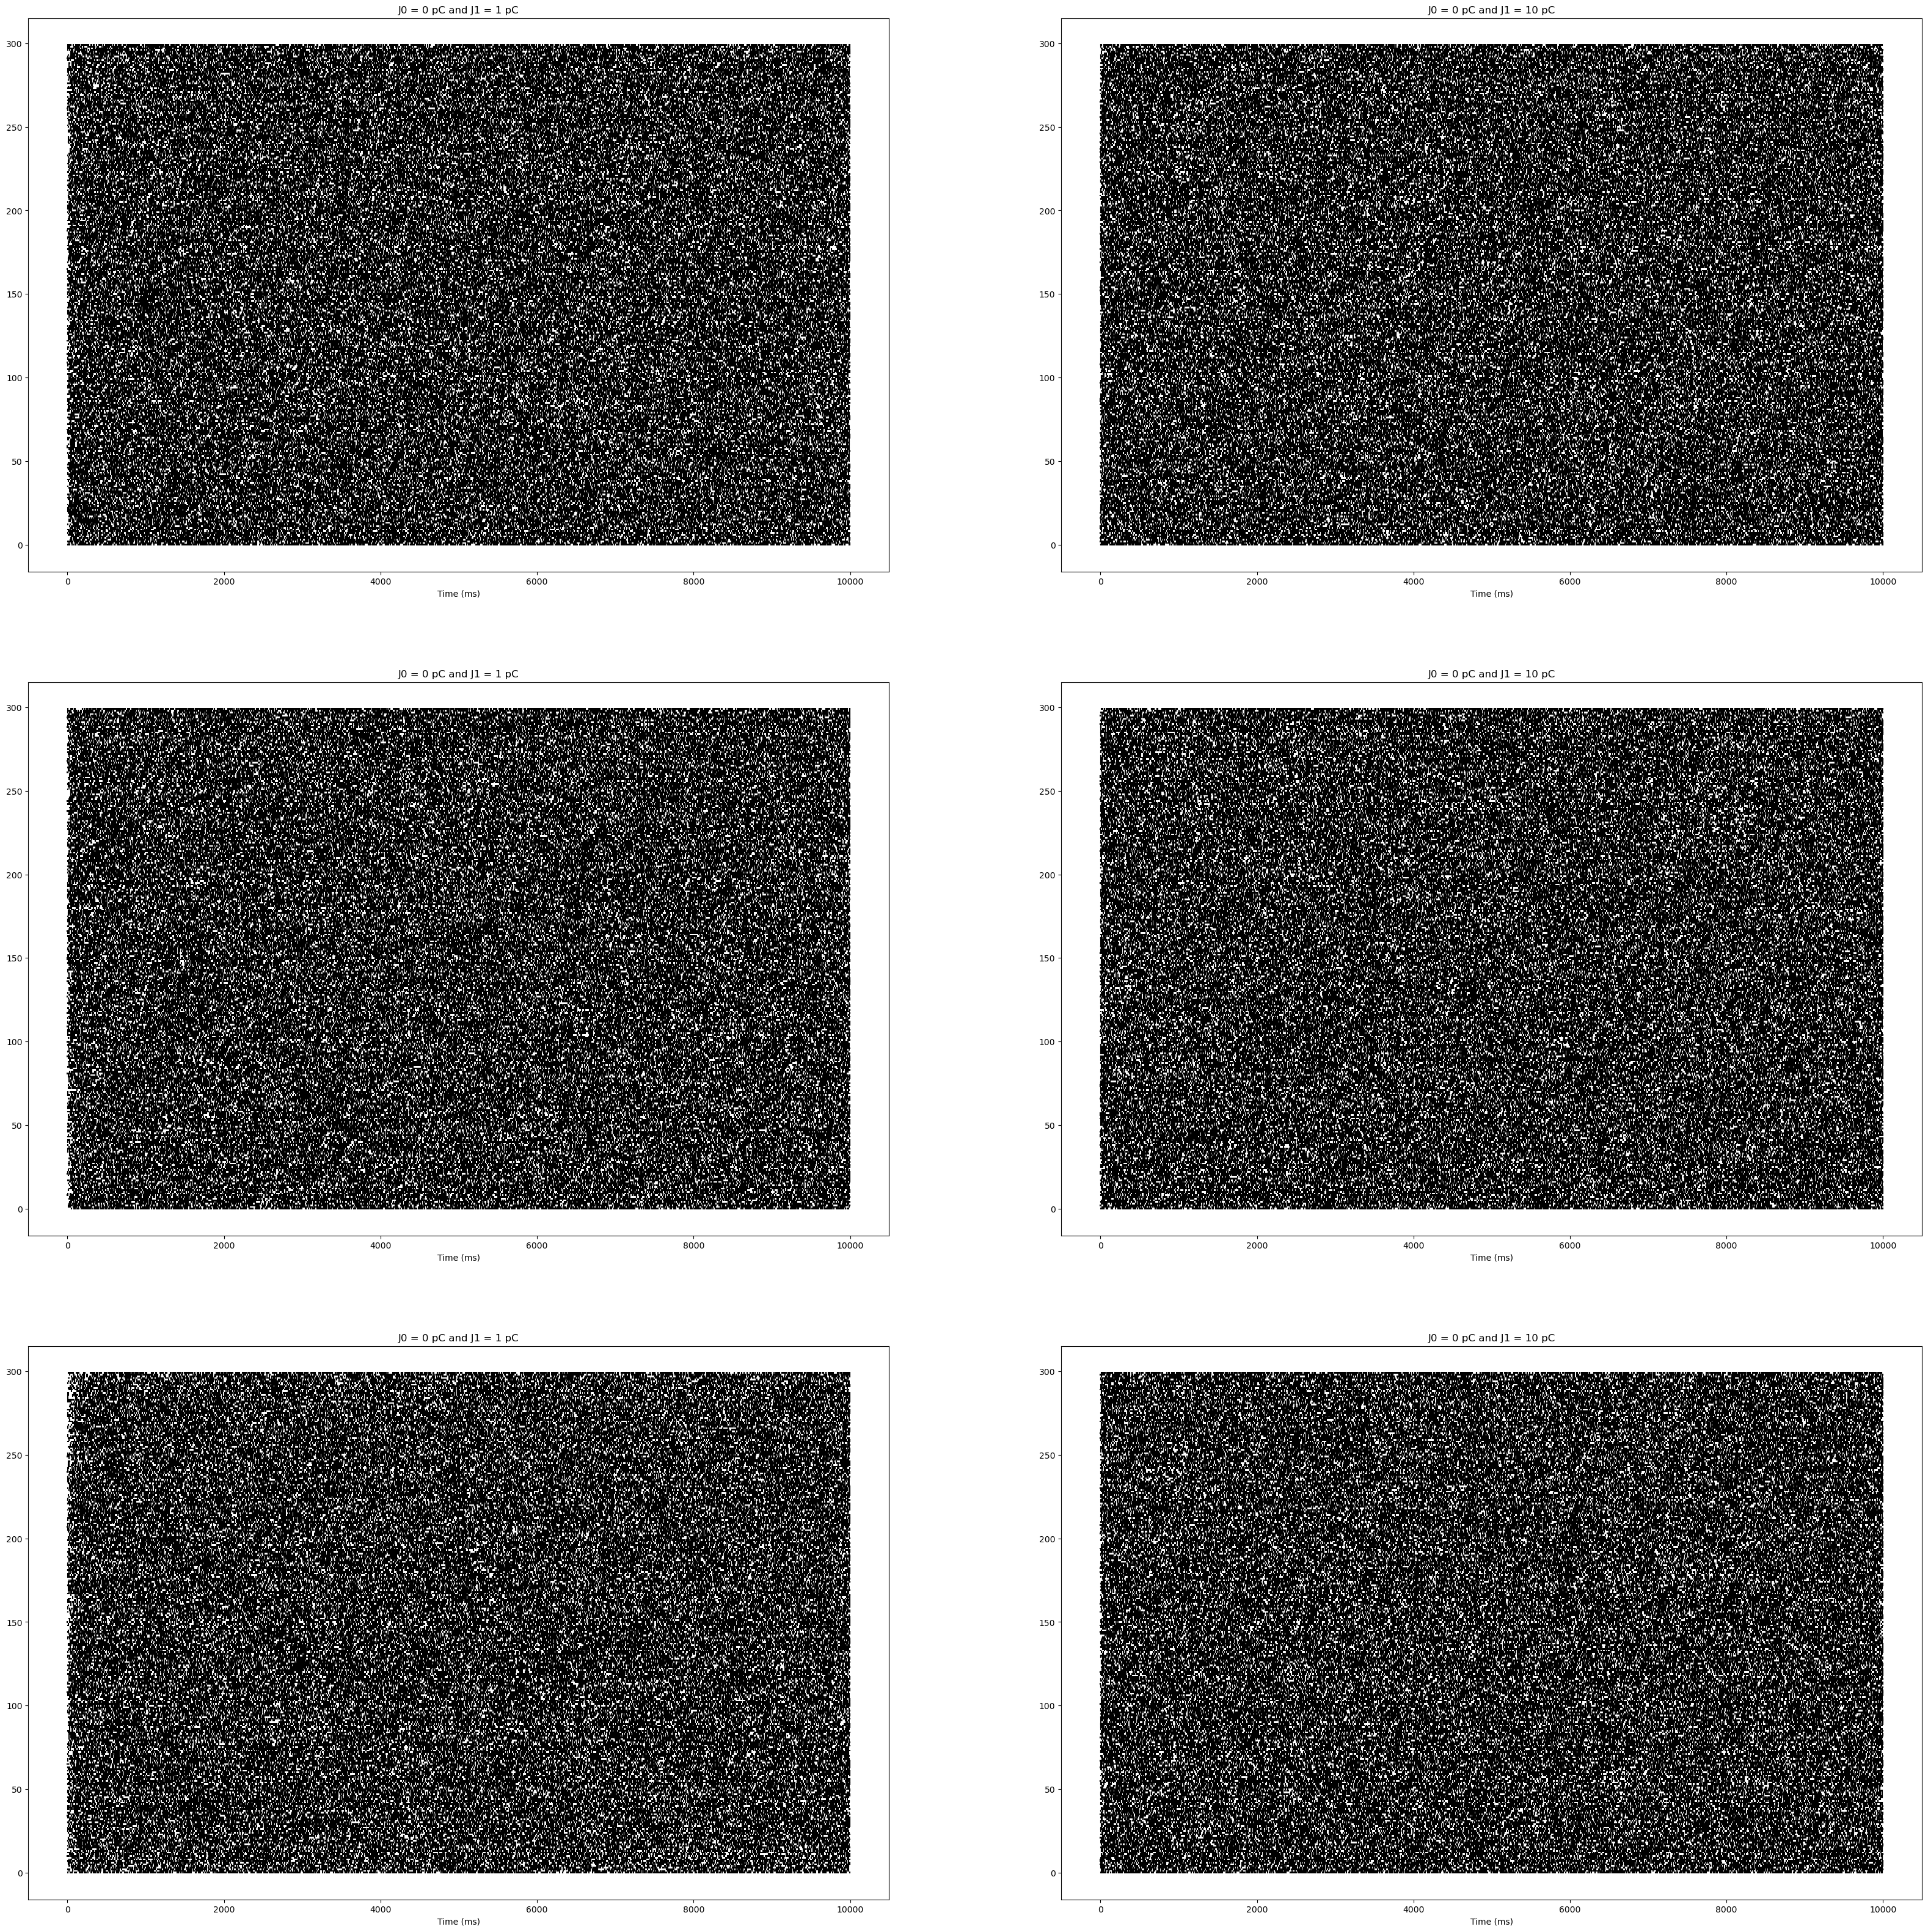

In [10]:
J1_values = [1, 10]
J0 =  0
sigma_values = [np.pi, np.pi/2, np.pi/3]

fig, ax = plt.subplots(len(sigma_values), len(J1_values), figsize=(40, 40))
# ax[0].set_ylabel('Neuron')

for i, sigma_w in enumerate(sigma_values):
    for j, J1 in enumerate(J1_values):
        print(f'J1 = {J1} and sigma = {sigma_w}')
        network = PoissonNeuron(J0=J0, J1=J1, sigma_w=sigma_w)
        h,s = network.spike_simulation(input_fct=network.line_input, initial_voltage=np.random.uniform(0, 1, ct.N))
        
        # s = bins_spike(s, 1)
        spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
        ax[i,j].eventplot(spike_times, orientation='horizontal', color="black")
        ax[i,j].set_title(f'J0 = {J0} pC and J1 = {J1} pC')
        ax[i,j].set_xlabel('Time (ms)')
plt.show()
    